In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
path = "C:/Users/predator/Downloads/strip1.png"
img = cv.imread(path,0)

In [2]:
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


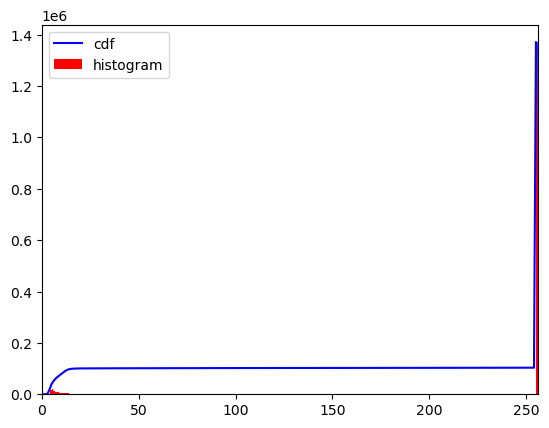

In [4]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [5]:
equ = cv.equalizeHist(img)

In [8]:
cv.imshow('equ.png',equ)
cv.waitKey(0)
cv.destroyAllWindows()

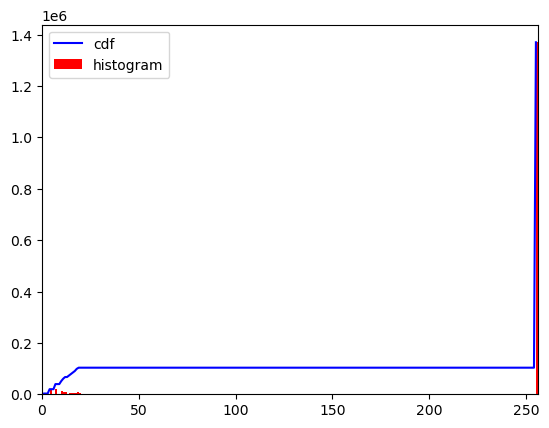

In [7]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [2]:
import numpy as np
from PIL import Image

# Define width and height
w, h = 12000, 90147

# Read file using numpy "fromfile()"
with open('C:\Users\predator\Desktop\SUH\data\calibrated\20211222\ch2_ohr_ncp_20211222T2023166276_d_img_d32.img', mode='rb') as f:
    d = np.fromfile(f,dtype=np.uint8,count=w*h).reshape(h,w)

# Make into PIL Image and save
PILimage = Image.fromarray(d)
PILimage.save('result.png')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2637430264.py, line 8)

In [24]:
image = cv.imread("C:/Users/predator/Desktop/final.png")
# Resizing the image for compatibility
#image = cv2.resize(image, (500, 600))
 
# The initial processing of the image
# image = cv2.medianBlur(image, 3)
image_bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
median_blur= cv.medianBlur(image_bw, 3)
clahe = cv.createCLAHE(clipLimit=5)
final_img = clahe.apply(median_blur) + 20 
Gaussian = cv.GaussianBlur(final_img, (3, 3), 0)
bilateral = cv.bilateralFilter(final_img, 9, 75, 75)


# Ordinary thresholding the same image
_, ordinary_img = cv.threshold(image_bw, 155, 255, cv.THRESH_BINARY)
 
# Showing the two images
#cv.imshow("CLAHE image", final_img)
cv.imshow('median_blur', bilateral) 
cv.waitKey(0)
cv.destroyAllWindows()


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import maxflow 
# Important parameter
# Higher values means making the image smoother
smoothing = 110

# Load the image and convert it to grayscale image 
image_path = 'your_image.png'
img = cv2.imread('image_path')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = 255 * (img > 128).astype(np.uint8)

# Create the graph.
g = maxflow.Graph[int]()
# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape)
# Add non-terminal edges with the same capacity.
g.add_grid_edges(nodeids, smoothing)
# Add the terminal edges. The image pixels are the capacities
# of the edges from the source node. The inverted image pixels
# are the capacities of the edges to the sink node.
g.add_grid_tedges(nodeids, img, 255-img)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# The labels should be 1 where sgm is False and 0 otherwise.
img_denoised = np.logical_not(sgm).astype(np.uint8) * 255

# Show the result.
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Binary image')
plt.subplot(122)
plt.title('Denoised binary image')
plt.imshow(img_denoised, cmap='gray')
plt.show()

ModuleNotFoundError: No module named 'maxflow'